# Recasting limits of the DS-50 high-mass analysis

This notebook shows how to recast DS-50 high-mass limits to different signal hypotheses

In [23]:
import sys
sys.path.append('../tools/')

In [24]:
import wimp_toy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
analysis_info = 'highmass.txt'  # TODO: this should point to RUCIO dataset content
LY = 10.

## Feldman-Cousins case

In [4]:
toy = wimp_toy.WIMPToy(emin=0, emax=500, estep=0.01,
              acceptance_model='DS50_highmass_interpolated',
              analysis_info=analysis_info,
              LY=LY)

We determine the exposure of the experiment

In [5]:
exposure = toy.analysis_info['exposure'] # 16660/1000./365 ton yr
exposure

0.04564383561643836

We define the set of WIMP masses to scan, and a benchmark cross-section

In [6]:
masses = np.logspace(1, 4, 10)
xsec = 1.14e-44

We generate events for these signal hypotheses

In [7]:
N_events = 100_000

In [8]:
events = [ toy.get_events(N_events=N_events, Mw=Mw, xsec=xsec, exposure=exposure) for Mw in masses ]

and determine the interesting quantity, i.e. the number of expected events after selection criteria

In [9]:
yields = [ np.sum(weight) for (E, S1, weight) in events]

Let's visualize how the number of expected events varies with the WIMP mass

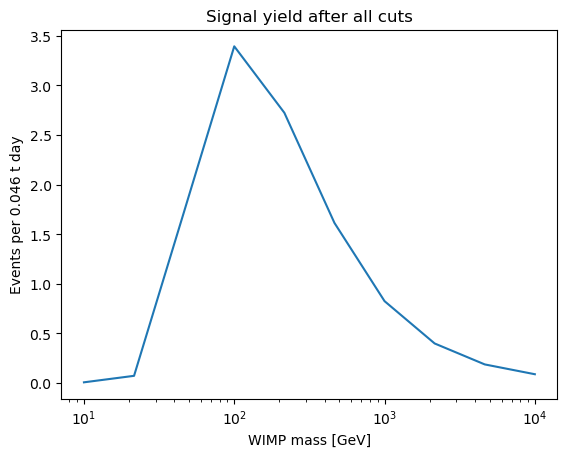

In [10]:
plt.plot(masses, yields)
plt.xlabel('WIMP mass [GeV]')
plt.ylabel(f'Events per {exposure:.2g} t day')
plt.title('Signal yield after all cuts')
plt.xscale('log')

In the assumption we observe 0 events, the Feldman-Cousins limit on the number of signal events is known. We can therefore calculate naively our limits on the signal cross-section

(2e-47, 1e-41)

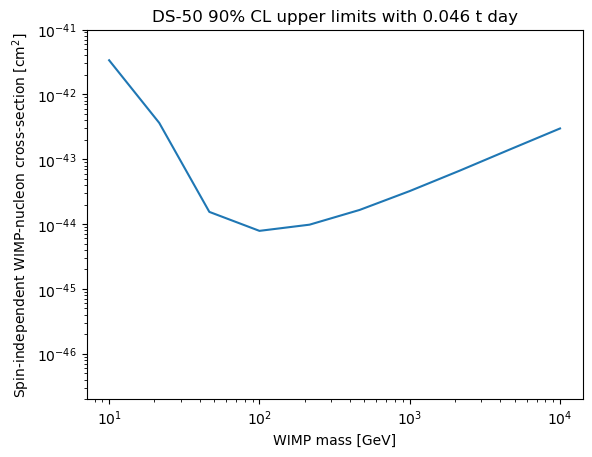

In [11]:
upper_limit = 2.34
plt.plot(masses, xsec / (np.array(yields)/upper_limit)) 
plt.xlabel('WIMP mass [GeV]')
plt.ylabel('Spin-independent WIMP-nucleon cross-section [cm$^2$]')
plt.title(f'DS-50 90% CL upper limits with {exposure:.2g} t day')
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-47, 1e-41)

This plot is in consistent with Fig. 12 from https://arxiv.org/pdf/1802.07198.pdf.